In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_theme()

In [2]:
df = pd.read_csv('../datasets/competition_dataset/dev.tsv', sep='\t')

df = df.drop_duplicates()

df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [3]:
top_15_countries = df.country.value_counts().head(15).index.tolist()
top_15_countries

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'Austria',
 'New Zealand',
 'Germany',
 'South Africa',
 'Greece',
 'Israel',
 'Hungary']

In [4]:
top_15_countries_df = df[df.country.isin(top_15_countries)]
len(top_15_countries_df)

84324

<AxesSubplot:xlabel='quality', ylabel='country'>

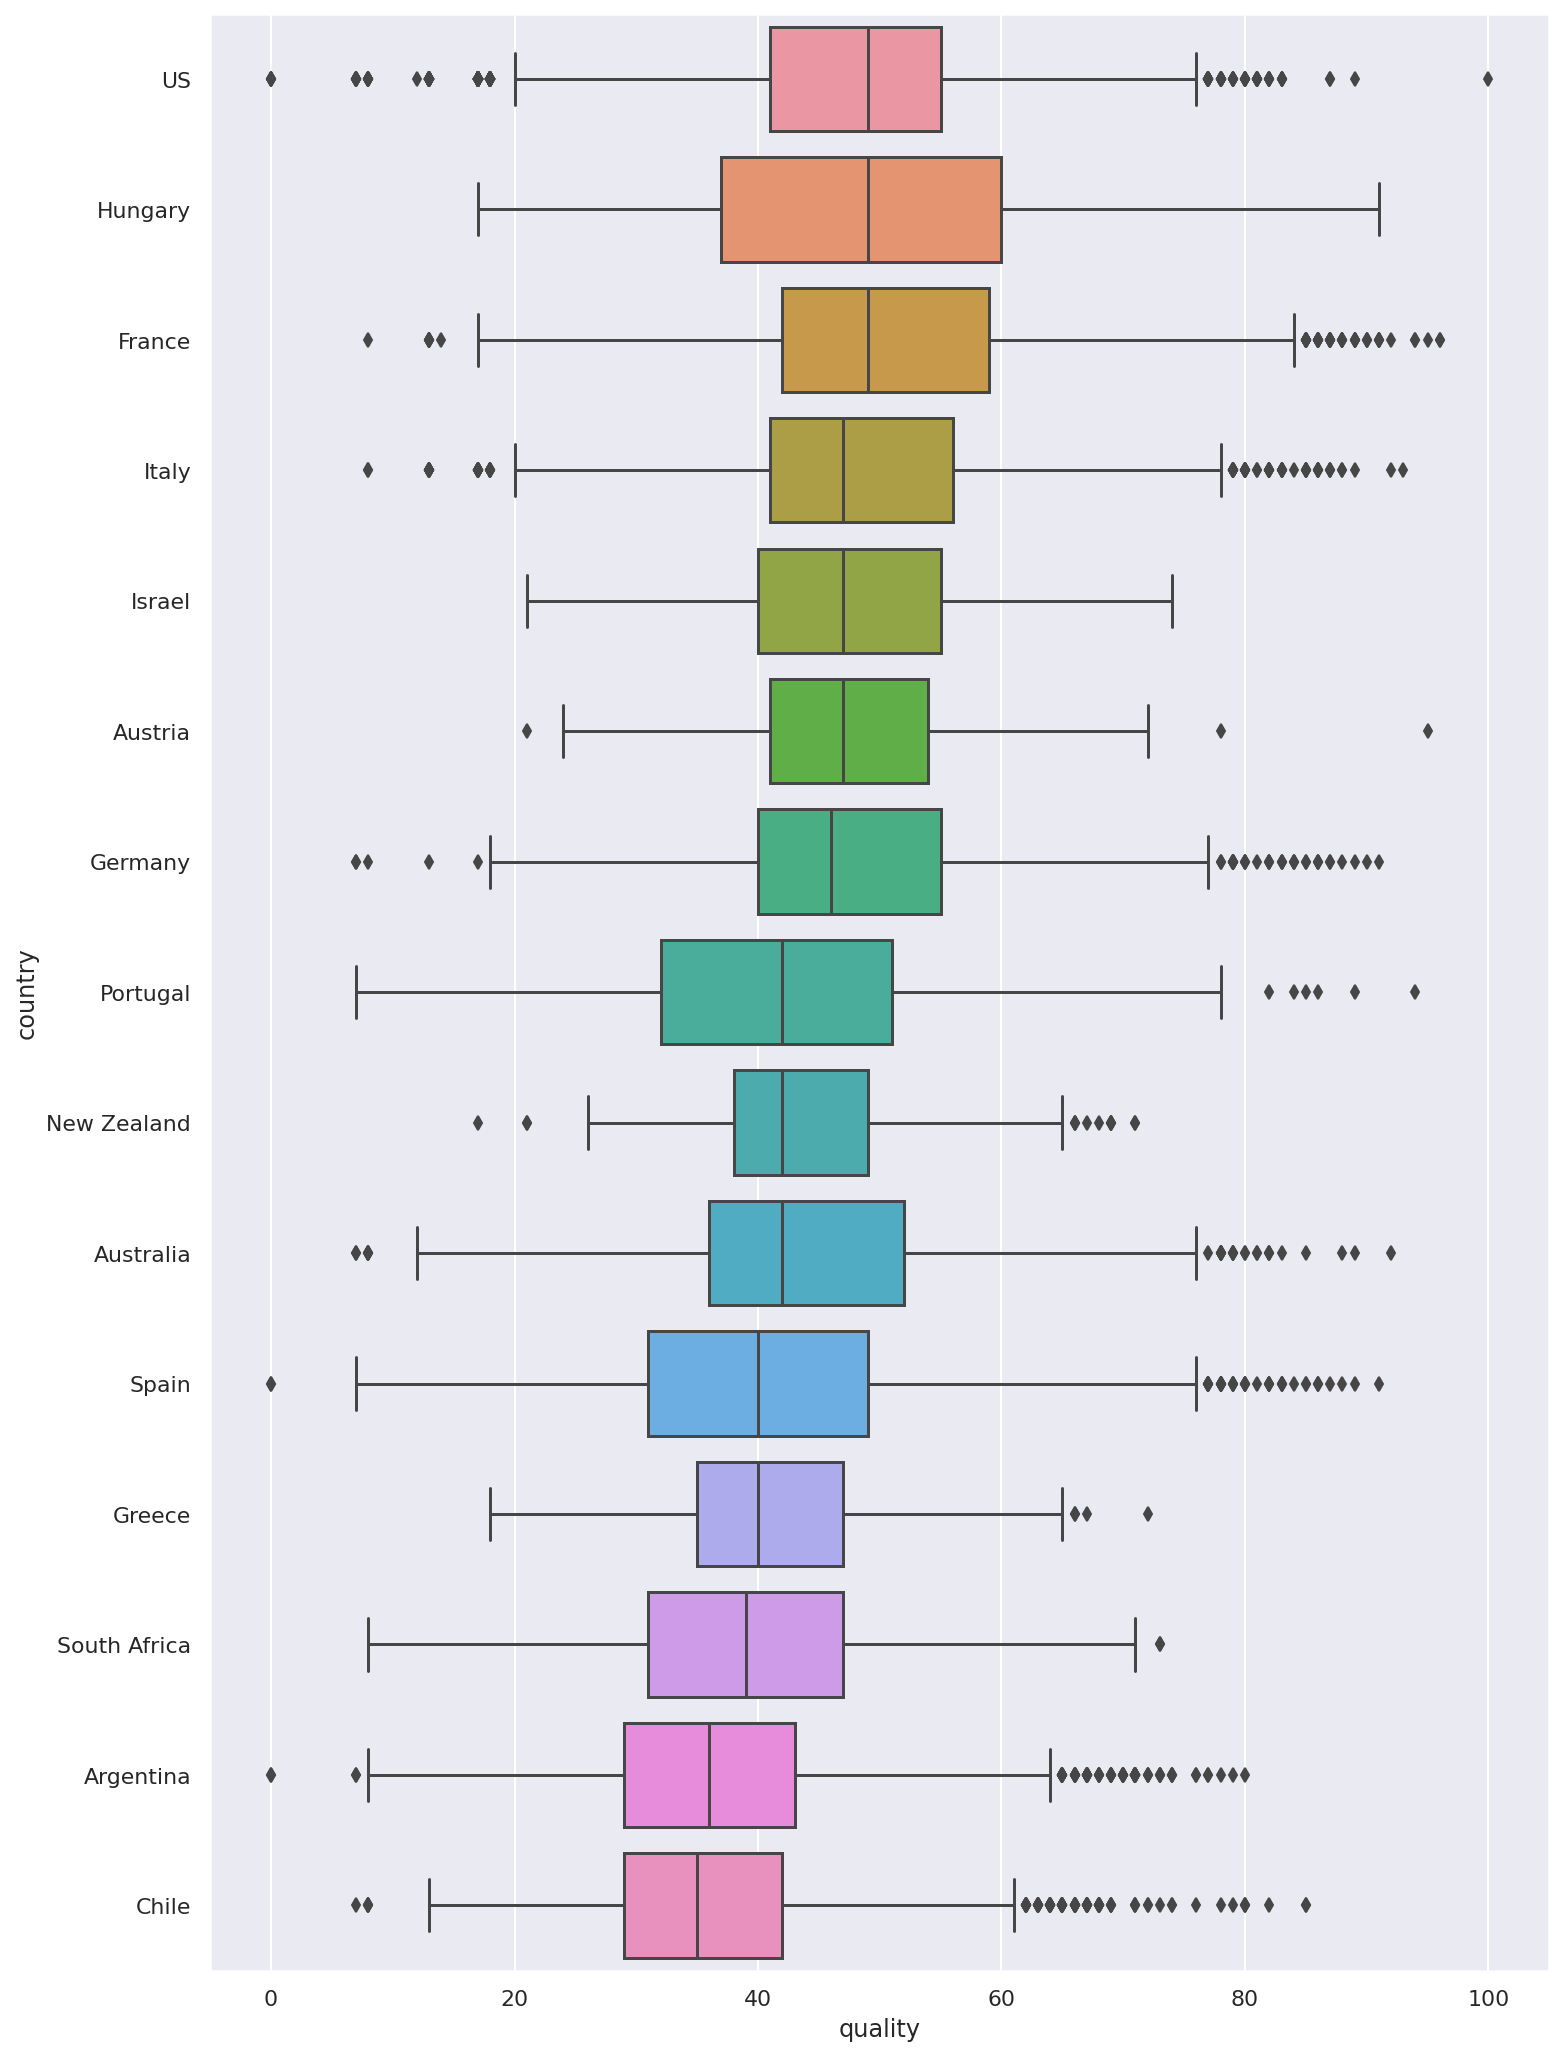

In [5]:
fig, ax = plt.subplots(figsize=(12, 18))
order = top_15_countries_df.groupby(by='country').quality.median().sort_values(ascending=False).index
sns.boxplot(ax=ax, data=top_15_countries_df, x='quality', y='country', order=order)

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(top_15_countries_df.country.to_numpy().reshape(-1, 1))
y = top_15_countries_df.quality.to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape

((63243, 15), (21081, 15))

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.08502655350545008

(20.0, 80.0)

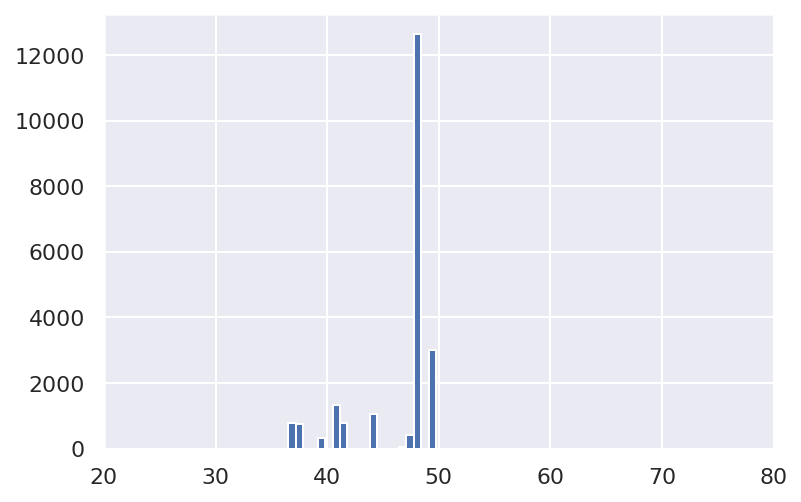

In [9]:
pd.Series(reg.predict(X_test)).hist(bins=20).set_xlim(20, 80)

(20.0, 80.0)

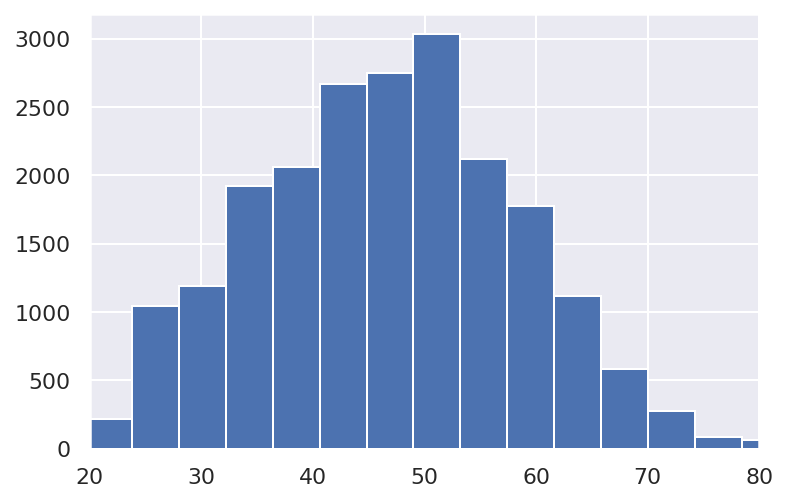

In [10]:
pd.Series(y_test).hist(bins=20).set_xlim(20, 80)

In [11]:
reg.intercept_

44.055802025910836

In [12]:
reg.coef_

array([-6.47624187,  0.1167451 ,  3.7228541 , -7.5195117 ,  5.69783511,
        3.69198123, -3.08181358,  2.53760457,  3.14172884,  4.19815811,
       -0.23420578, -2.26565118, -4.48301721, -3.01667034,  3.97020459])

In [13]:
top_15_countries_df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [14]:
import statsmodels.formula.api as smf
results = smf.ols('quality ~ country', data=top_15_countries_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     614.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:33:20   Log-Likelihood:            -3.2456e+05
No. Observations:               84324   AIC:                         6.492e+05
Df Residuals:                   84309   BIC:                         6.493e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  37.6340      0.205    183.335      0.000      37.232      38.036
country[T.Australia]        6.3066      0.299     21.087      0.000       5.720       6.893
country[T.Austria]         10.1296      0.343     29.553      0.000       9.458      10.801
country[T.Chile]           -0.9529      0.286     -3.330      0.001      -1.514      -0.392
country[T.France]          12.1162      0.229     52.840      0.000      11.667      12.566
country[T.Germany]         10.1640      0.372     27.330      0.000       9.435      10.893
country[T.Greece]           3.5015      0.565      6.193      0.000       2.393       4.610
country[T.Hungary]         10.7020      1.037     10.323      0.000       8.670      12.734
country[T.Israel]           9.5794      0.660     14.514      0.000       8.286      10.873
country[T.Italy]           10.5331      0.228     46.182      0.000      10.086      10.980
country[T.New Zealand]      6.0984      0.345     17.661      0.000       5.422       6.775
country[T.Portugal]         4.2711      0.291     14.665      0.000       3.700       4.842
country[T.South Africa]     2.0999      0.378      5.551      0.000       1.358       2.841
country[T.Spain]            3.4394      0.264     13.043      0.000       2.923       3.956
country[T.US]              10.3539      0.214     48.378      0.000       9.934      10.773
==============================================================================
Omnibus:                      213.060   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.173
Skew:                           0.110   Prob(JB):                     2.55e-48
Kurtosis:                       3.118   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""